In [132]:
from google.colab import drive
from sklearn.linear_model import LinearRegression
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import datetime
import torch

meta = pd.read_csv( './owid-covid-data.csv' )
meta['date'] = pd.to_datetime(meta['date'], format='%Y-%m-%d', errors='raise')
meta

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127812,ZWE,Africa,Zimbabwe,2021-10-28,132880.0,72.0,48.571,4675.0,0.0,1.857,8804.565,4.771,3.218,309.763,0.000,0.123,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3966.0,1365439.0,90.473,0.263,3180.0,0.211,0.015,65.5,tests performed,5896902.0,3306845.0,2590057.0,NaN,14221.0,14231.0,39.07,21.91,17.16,NaN,943.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127813,ZWE,Africa,Zimbabwe,2021-10-29,132926.0,46.0,48.286,4675.0,0.0,1.714,8807.613,3.048,3.199,309.763,0.000,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740.0,1368179.0,90.655,0.182,3018.0,0.200,0.016,62.5,tests performed,5914009.0,3315108.0,2598901.0,NaN,17107.0,14174.0,39.19,21.97,17.22,NaN,939.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,Na

In [133]:
date = meta['date']
Korea = meta[meta['location'] == 'South Korea']
Japan = meta[meta['location'] == 'Japan']

In [134]:
#Korea[Korea['people_fully_vaccinated_per_hundred'].notna()]['people_fully_vaccinated_per_hundred'].mean()
#Japan[Japan['people_fully_vaccinated_per_hundred'].notna()]['people_fully_vaccinated_per_hundred'].mean()

copy_k = Korea.copy()
copy_j = Japan.copy()

copy_k['total_cases_per_million'] = copy_k['total_cases_per_million'].interpolate()#fillna(method='bfill')
copy_j['total_cases_per_million'] = copy_j['total_cases_per_million'].interpolate()#fillna(method='bfill')

copy_k['new_cases_per_million'] = copy_k['new_cases_per_million'].interpolate()#fillna(method='bfill')
copy_j['new_cases_per_million'] =copy_j['new_cases_per_million'].interpolate()#fillna(method='bfill')

copy_k['people_vaccinated_per_hundred'] = copy_k['people_vaccinated_per_hundred'].interpolate()#fillna(method='bfill')
copy_j['people_vaccinated_per_hundred'] =copy_j['people_vaccinated_per_hundred'].interpolate()#fillna(method='bfill')

copy_k['people_fully_vaccinated_per_hundred'] = copy_k['people_fully_vaccinated_per_hundred'].interpolate()#fillna(method='bfill')
copy_j['people_fully_vaccinated_per_hundred'] =copy_j['people_fully_vaccinated_per_hundred'].interpolate()#fillna(method='bfill')



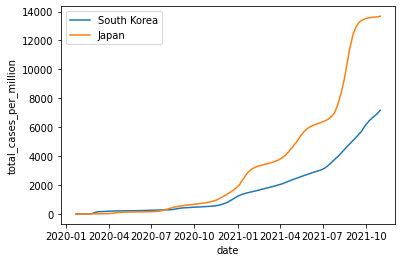

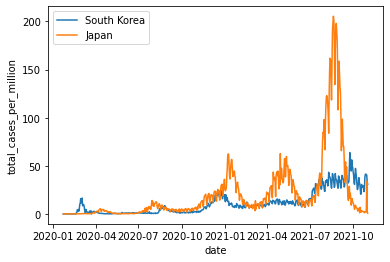

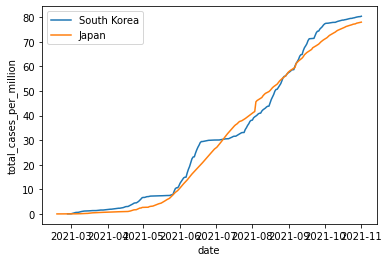

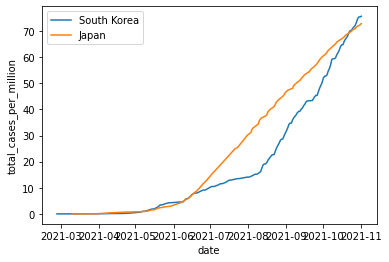

In [4]:
# 날짜별 확진자 비율 (total_cases_per_million) 시각화

plt.plot(copy_k['date'], copy_k['total_cases_per_million'], label='South Korea')
plt.plot(copy_j['date'], copy_j['total_cases_per_million'], label='Japan')

plt.legend(loc="upper left")
plt.xlabel("date")
plt.ylabel("total_cases_per_million")
plt.show()

#  날짜별 신규 확진자 비율 (new_cases_per_million) 시각화
plt.plot(copy_k['date'], copy_k['new_cases_per_million'], label='South Korea')
plt.plot(copy_j['date'], copy_j['new_cases_per_million'], label='Japan')

plt.legend(loc="upper left")
plt.xlabel("date")
plt.ylabel("total_cases_per_million")
plt.show()

# 날짜별 백신 접종자 비율 (people_vaccinated_per_hundred) 시각화
plt.plot(copy_k['date'], copy_k['people_vaccinated_per_hundred'], label='South Korea')
plt.plot(copy_j['date'], copy_j['people_vaccinated_per_hundred'], label='Japan')

plt.legend(loc="upper left")
plt.xlabel("date")
plt.ylabel("total_cases_per_million")
plt.show()

#  날짜별 백신 접종 완료자 비율 (people_fully_vaccinated_per_hundred) 시각화
plt.plot(copy_k['date'], copy_k['people_fully_vaccinated_per_hundred'], label='South Korea')
plt.plot(copy_j['date'], copy_j['people_fully_vaccinated_per_hundred'], label='Japan')

plt.legend(loc="upper left")
plt.xlabel("date")
plt.ylabel("total_cases_per_million")
plt.show()

Pearson Correlation Coefficient -0.37597452130343917


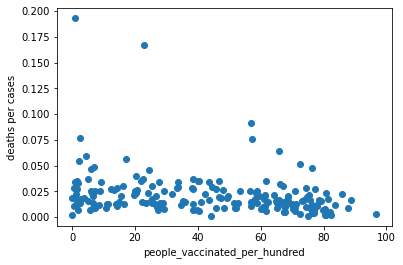

In [135]:
#Task 3-1
meta2 = meta[[ 'location', 'date', 'total_deaths_per_million', 'total_cases_per_million', 'people_vaccinated_per_hundred', 'human_development_index'] ]
dataset = pd.DataFrame(meta2, columns=['location', 'date', 'total_deaths_per_million', 'total_cases_per_million', 'people_vaccinated_per_hundred', 'human_development_index'])
df = dataset.groupby('location').max()

X = df['people_vaccinated_per_hundred']
Y = df['total_deaths_per_million'].div(df['total_cases_per_million'])

plt.scatter(X, Y)
plt.xlabel("people_vaccinated_per_hundred")
plt.ylabel("deaths per cases")
plt.show

def corr(X, Y):
  
  X = X.dropna(how='any')
  Y = Y.dropna(how='any')

  mean_x = X.mean()
  mean_y = Y.mean()
  #(df['total_deaths_per_million'].mean() + df['total_cases_per_million'].mean()) / 2

  #X = X.fillna(mean_x)
  #Y = Y.fillna(mean_y)
  std_x = ((X.sub(mean_x)).mul(X.sub(mean_x)).sum() / (len(X)-1)) ** 0.5
  std_y = ((Y.sub(mean_y)).mul(Y.sub(mean_y)).sum() / (len(Y)-1)) ** 0.5

  cov = (X.mul(Y)).mean() - mean_x * mean_y
  corr = cov/std_x/std_y
  
  return corr
 
CORR = corr(X, Y)
print("Pearson Correlation Coefficient", CORR)


Pearson Correlation Coefficient 0.10081435233310657
w : 0.1468333750963211 b : 46.396240234375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.


<function matplotlib.pyplot.show>

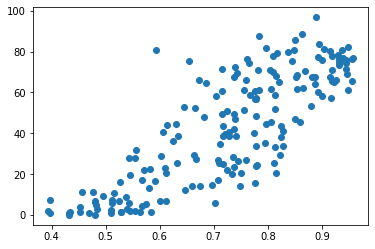

In [136]:
#Task4
CORR = corr(df['human_development_index'], df['people_vaccinated_per_hundred'])
print("Pearson Correlation Coefficient", CORR)

plt.scatter(df['human_development_index'], df['people_vaccinated_per_hundred'])

X = df['human_development_index'].dropna(how='any')
Y = df['people_vaccinated_per_hundred'].dropna(how='any')
X = torch.FloatTensor(X.to_numpy())
Y = torch.FloatTensor(Y)


W = torch.zeros(1, 227)
b = torch.zeros(1, 1)
lr = 0.01

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  #print(X.view(190, 1))
  hypothesis = torch.mm(X.view(-1, 1), W) + b
  cost = torch.mean((hypothesis - Y) ** 2)
  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad
print("w :", W.mean().item(), "b :", b.item())
plt.plot(X.view(1, 190), (X.max() - X.min())*W + b)
plt.show